In [1]:
import cv2 as cv
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
import os
import os.path as path
%matplotlib inline

In [93]:
def _imshow(image):
    plt.figure(figsize=(12,8))
    plt.imshow(image, interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([]) 
    plt.show()

In [233]:
base_data_dir = os.path.join('.', 'data', 'Obermuehle')
couples = {}
filesA = list(filter(lambda f: f[0] == 'A', os.listdir(base_data_dir)))
for filename in filesA:
    couples[filename[1:]] = [os.path.join(base_data_dir, filename), os.path.join(base_data_dir, filename[1:])]
couple_images = {}
for c in couples:
    couple_images[c] = [cv.imread(couples[c][0]), cv.imread(couples[c][1])]

Defect bruciatuagialla.bmp


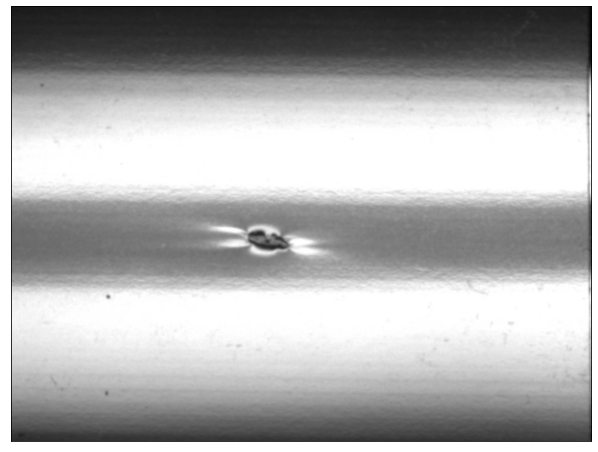

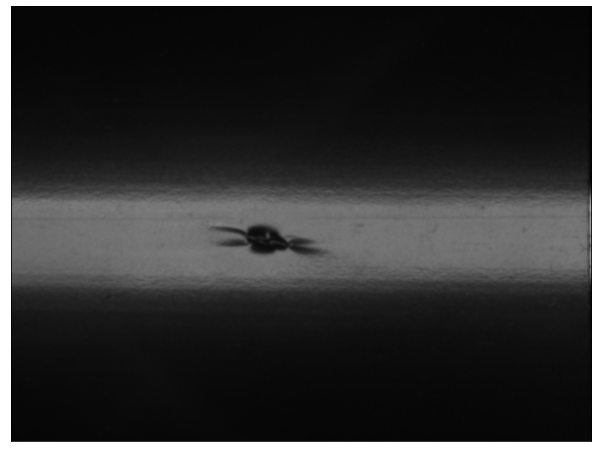

In [234]:
for c in couple_images:
    print("Defect {}".format(c))
    _imshow(couple_images[c][0])
    _imshow(couple_images[c][1])
    break

AVG 1 123 - AVG 2 149

Defect bruciatuagialla.bmp


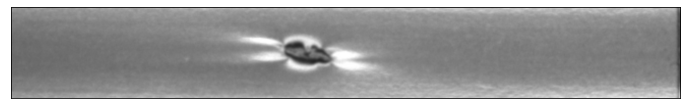

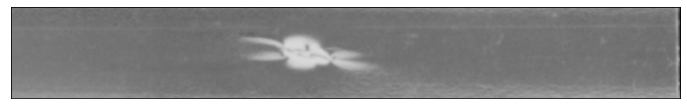

AVG 1 123 - AVG 2 152

Defect bruciatuaxxl.bmp


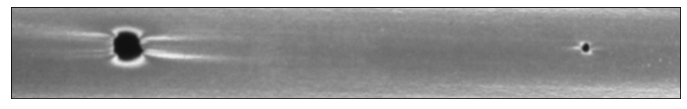

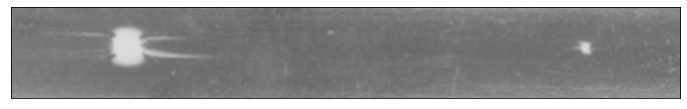

AVG 1 117 - AVG 2 147

Defect bruciatuaxxs.bmp


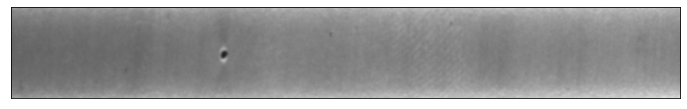

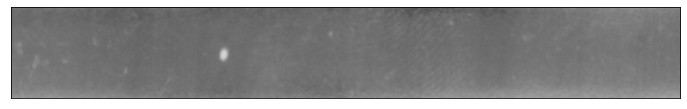

AVG 1 79 - AVG 2 120

Defect foro.bmp


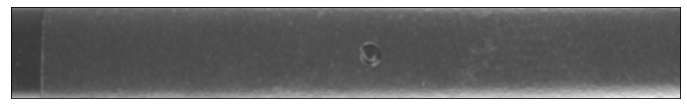

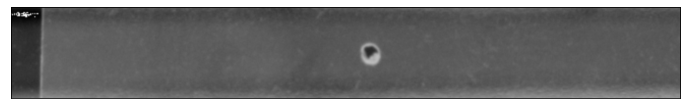

AVG 1 92 - AVG 2 155

Defect gelo.bmp


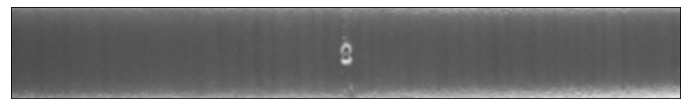

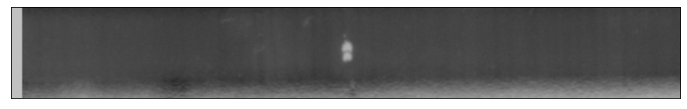

AVG 1 79 - AVG 2 154

Defect gelo2.bmp


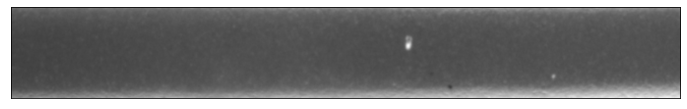

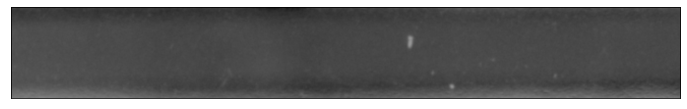

AVG 1 88 - AVG 2 141

Defect geloallungato.bmp


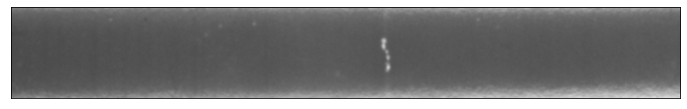

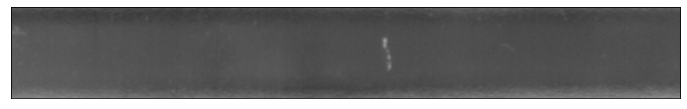

AVG 1 119 - AVG 2 148

Defect geloxxs.bmp


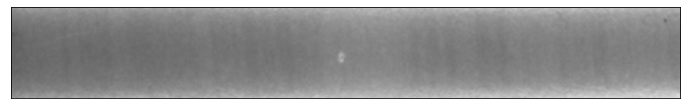

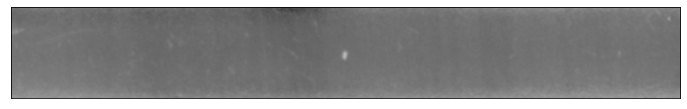

AVG 1 77 - AVG 2 133

Defect geloxxs2.bmp


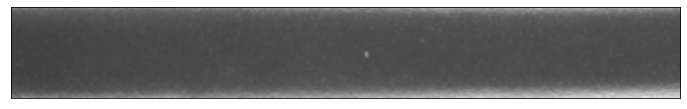

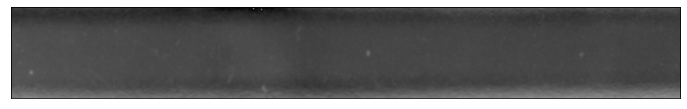

AVG 1 123 - AVG 2 151

Defect graffio.bmp


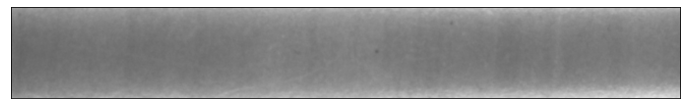

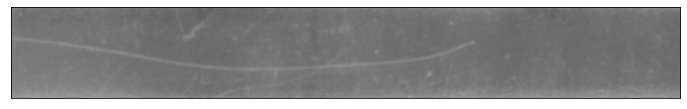

In [235]:
processes = {}
avg = {}
for i, c in enumerate(couple_images):
    roi_background1 = couple_images[c][0][220:310, 0:80, :]
    roi_background2 = 255 - couple_images[c][1][220:310, 0:80, :]
    avg[c] = [int(np.average(roi_background1)), int(np.average(roi_background2))]
    
    print("AVG 1 {} - AVG 2 {}\n".format(avg[c][0], avg[c][1]))
    print("Defect {}".format(c))
    delta = avg[c][1] - avg[c][0]
    processes[c] = [couple_images[c][0][220:310, :, :], 255 - couple_images[c][1][220:310, :, :] - delta]
    
    _imshow(processes[c][0])
    _imshow(processes[c][1])

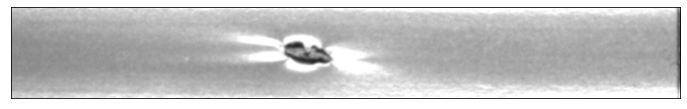

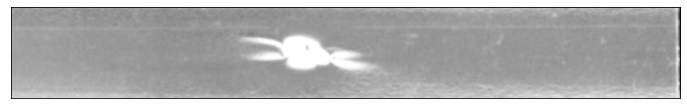

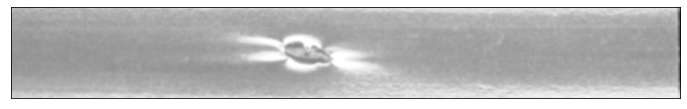

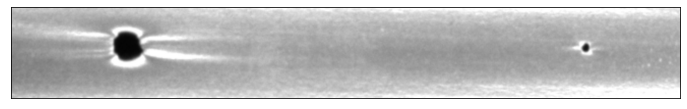

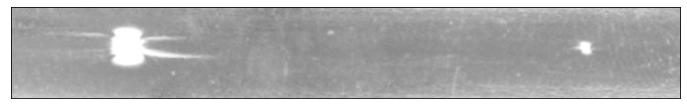

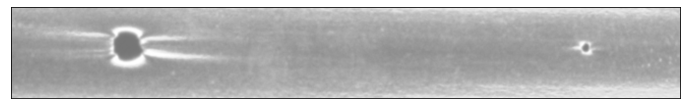

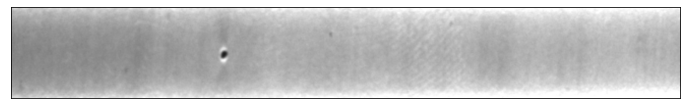

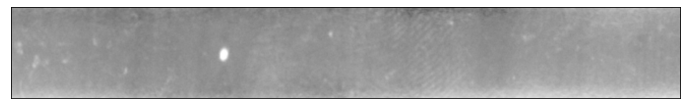

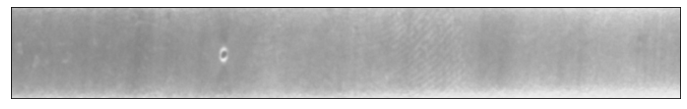

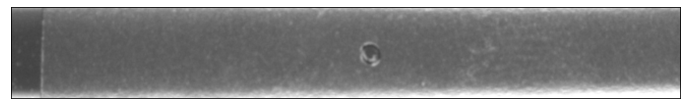

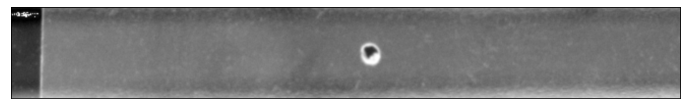

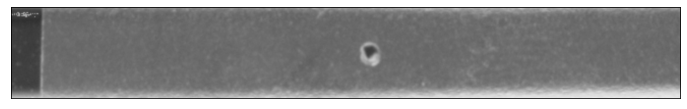

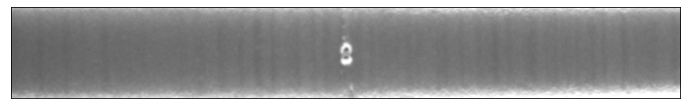

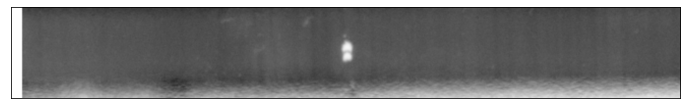

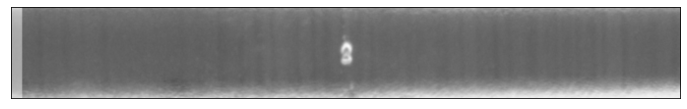

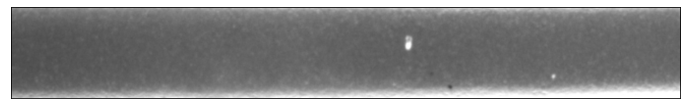

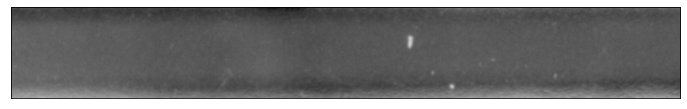

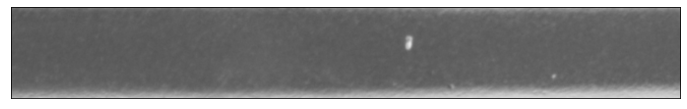

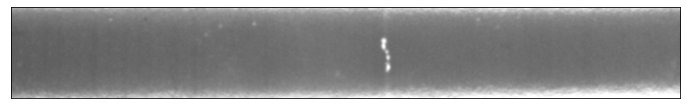

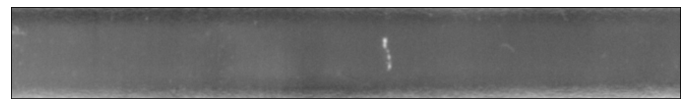

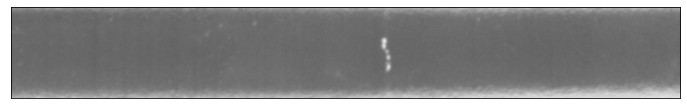

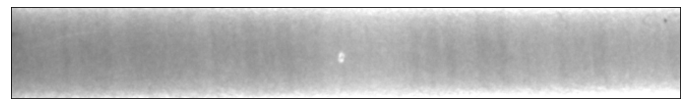

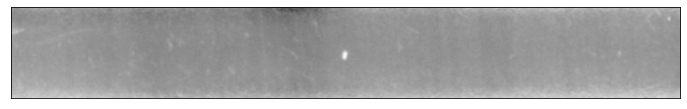

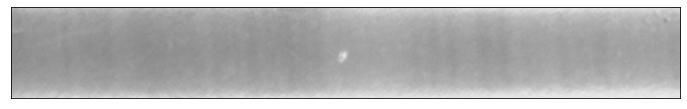

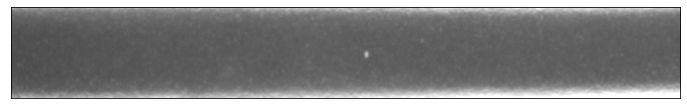

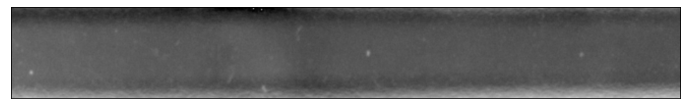

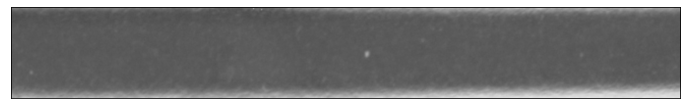

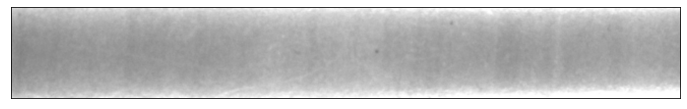

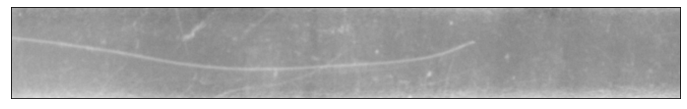

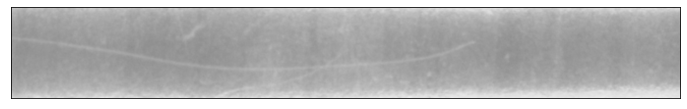

In [236]:
out_data_dir = os.path.join('.', 'data', 'Obermuehle_result')
for c in processes:
    images = processes[c][:]
    images[0] = cv.convertScaleAbs(images[0], alpha=1.5, beta=-20)
    _imshow(images[0])
    images[1] = cv.convertScaleAbs(images[1], alpha=1.5, beta=-20)
    _imshow(images[1])
    hdr = cv.convertScaleAbs(cv.addWeighted(images[0], 0.55, images[1], 0.45, 0), alpha=1, beta=0)
    # hdr = cv.LUT(hdr, lookUpTable)
    _imshow(hdr)
    cv.imwrite(os.path.join(out_data_dir, c), hdr)

In [ ]:
mergeDebevec = cv.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)
_imshow(hdrDebevec)